In [120]:
"""
Created on Thu Jun  9 21:11:29 2022

Student: David Cruz
Student Z ID: 23348104
Class: CAP5615 - Summer 2022
Prof: Xingquan (Hill) Zhu
Version Final
Submission Date: June 21th, 2022

@author: davidcruz
"""

'\nCreated on Thu Jun  9 21:11:29 2022\n\nStudent: David Cruz\nStudent Z ID: 23348104\nClass: CAP5615 - Summer 2022\nProf: Xingquan (Hill) Zhu\nVersion 0.1\nSubmission Date: June 11th, 2022\n\n@author: davidcruz\n'

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [122]:
# create moon shaped dataset with noise 0.3
from sklearn.datasets import make_moons, make_classification
moon =make_moons(noise=0.3, random_state=0)
features,labels=moon
print(features)
print(labels)

[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]
 [ 0.47404723 -0.14575067]
 [ 1.05614605 -1.03570207]
 [ 1.86500732 -0.01107874]
 [ 0.4194721  -0.32478101]
 [ 0.06873258  0.56648467]
 [-0.17332432  1.00215131]
 [ 0.12412421  1.00062892]
 

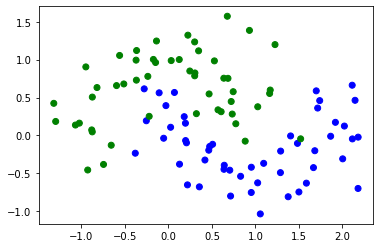

In [123]:
colors=["green","blue"]
plt.scatter(features[:,0],features[:,1],color=[colors[idx] for idx in labels])

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
h = .02  # step size in the mesh
X, y=features,labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

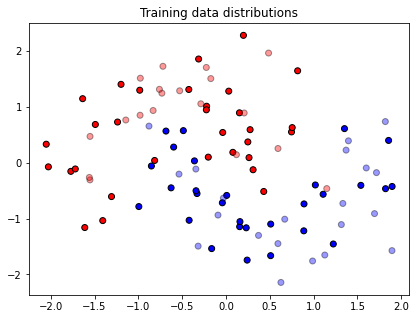

In [125]:
# just plot the dataset first
from matplotlib.colors import ListedColormap
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Training data distributions")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4, edgecolors='k')

In [126]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=3,
              max_iter=500, random_state=12, solver='lbfgs')

In [127]:
# find slope and intercept of the line corresponnding to each hideen node (1st hidden layer) 
def findSlopeIntercept(coefs,bias):
    hidden_wts=coefs[0]
    bias_wts=bias[0]
    num=len(hidden_wts[0])
    slopIntercept=[]
    for i in range(num):
        w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]]
        slope=w[1]/w[2]*(-1)
        intercept=w[0]/w[2]*(-1)
        slopIntercept.append([slope,intercept])
    return(slopIntercept)

In [128]:
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
slopeIntercept

[[1.0555978672174267, -1.5843772744124067],
 [0.6945453454955896, 1.0850690646999888],
 [0.3227875628067516, -0.7177844476149889]]

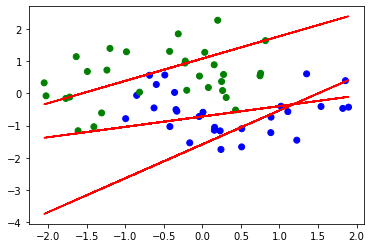

In [129]:
colors=["green","blue"]
xvalues=X_train[:,0]
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"r-")

Text(0.5, 1.0, 'Multi Layer Neural Network')

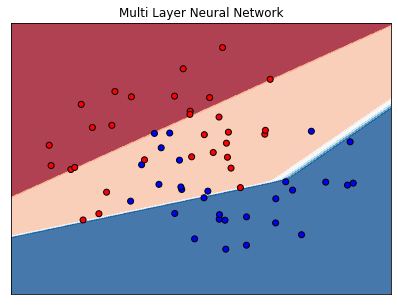

In [130]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')

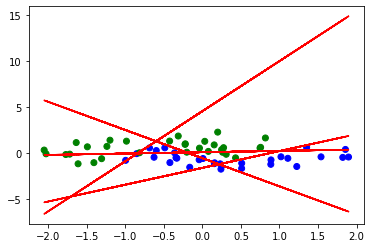

In [131]:
# now increase to 4 hidden nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4, random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"r-")

Text(0.5, 1.0, 'Multi Layer - 4 hidden nodes - Neural Network')

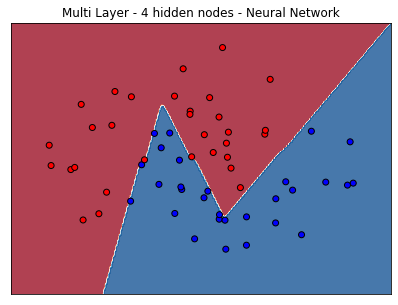

In [132]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer - 4 hidden nodes - Neural Network')

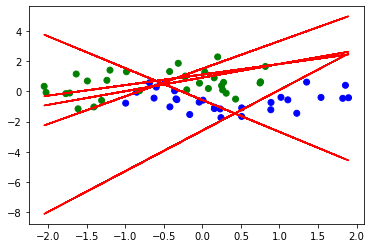

In [133]:
# now increase to 5 hidden nodes. As we add more hidden nodes, the model is becoming more complex
# and therefore, have a higher risk of overfitting
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5, random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train)
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1]
    plt.plot(xvalues,yvalues,"r-")

[]

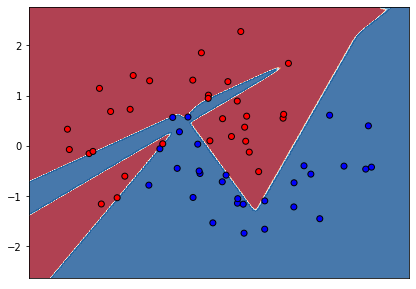

In [134]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())

In [135]:
ax.set_yticks(())
ax.set_title('Multi Layer - 5 hidden nodes- Neural Network')

Text(0.5, 1.0, 'Multi Layer - 5 hidden nodes- Neural Network')

In [136]:
"""QUESTION 12"""

'QUESTION 12'

In [201]:
# some codes were adopated from https://www.kaggle.com/serkanpeldek/face-recognition-on-olivetti-dataset             
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [202]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [203]:
# data (400 images, each 64x64)
print(data.shape)
# labels
print(target.shape)
print(target)

(400, 64, 64)
(400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32

In [204]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For each iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

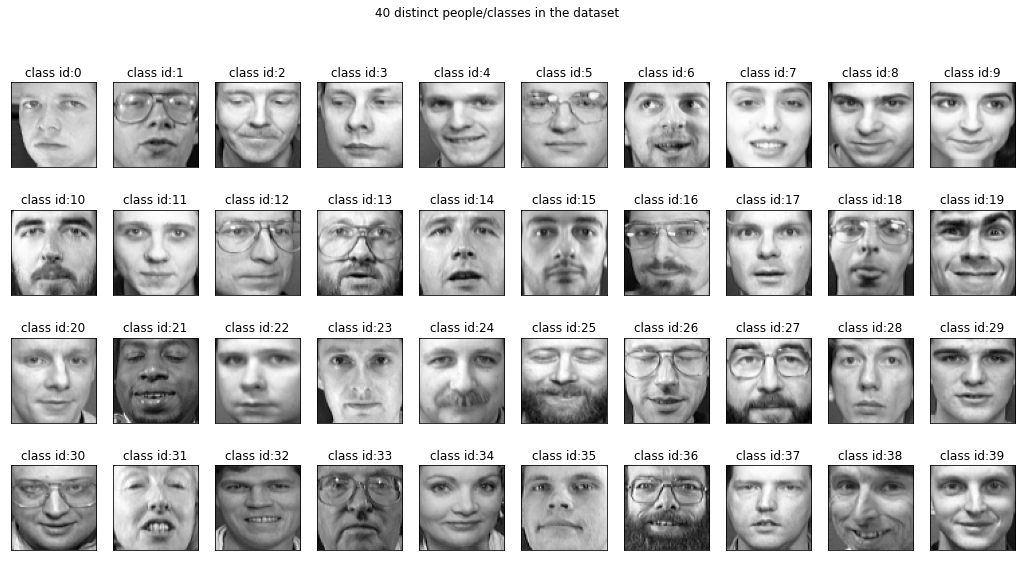

In [205]:
show_a_random_face_per_class(data, np.unique(target))

In [206]:
# now we flatten each 64x64 image as a single vector 64x64=4096 (for training NN)
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

(400, 4096)

In [207]:
# now we split training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.4, stratify=target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(240, 4096)
(160, 4096)


In [208]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=10000)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=10000,
              random_state=42)

In [209]:
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)

[19 19 17  2 27 14 13  9 37 21 35 39 39 13 35  3 31 19 20 16 29  9 13 30
 20 11 34  5 15 25 14 23 22 18  2 38 35 24  2 30  5 12 12  7 33 15  4 16
  4 11  0  7 39 34  0 26 30 38 22 26  1 13 24 36 17 27 14 10 28 39 38 32
 15  8 11 25 28 20 10  4  6 10 18  9  0 35 34 18  8 16 16 12 28 18  7 25
  7 37 31 21 29  6 21  9  3  0 33 26  6 27 17 23 33 24 38 32 12 37 15  1
  1 34 31 14  8 33 31  1 10 22 17 19 30 36 29  5 23  8  5 36 32  6  3 29
 20 24 32 22 26  4 36 25 27 37 28 11 21  3 23  2]
[19 19 17  2 27 12 13  9 37 21  6 39 39 13 35  3 31 15 38 16 29  9 13 30
 20 11 34  5 15 36 14 23 22 18  2 38 35 24  2  6  5 12 12  7 33 15 16 16
  4 11 17  7 37  4 34 26 30 38 22 26  1 13 24 36 17 27 14 10 28 39 38 32
 15  8 11 25 28 20 10  4  6 10 18 22 17 35 34 18  8 25 16 39 28 18 17 36
  7 37 31 31 29  6 21  9  3  0 33 26  6 27 17 23 33 24 38 32 35 37 15  1
  1 20 31 14  8 33 31  1 10 22 17 15 30 36 28  5 23  8  5 36 28  6  3 29
 20 24 32 22 26  4 36 24 27 37 17 11 21 38  9 38]


In [210]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 1, 0, 3]])

In [211]:
# use scikit-learn to calculate accuracy. 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.825

In [224]:
def crossValidationTree(X, y):
    from sklearn.metrics import confusion_matrix, accuracy_score
    from sklearn.model_selection import KFold
    #y = pd.DataFrame(y)
    #X, y = df.iloc[:,0:-1], df.loc[:,['Medv']]
    kf = KFold(n_splits=10, shuffle=True)
    kf.get_n_splits(X)
    #Accuracy lists
    Acc1 = []
    Acc2 = []
    Acc3 = []
    Acc4 = []
    """
    #AUC Score lists
    Auc1 =[]
    Auc2 = []
    Auc3=[]
    """
    
    """
    Inside each fold of the 10-fold cross validation, 
    using training set (and all features, excluding the class label) to train four MLP models. 
    """
    for trainIndex, testIndex in kf.split(X):
        xTrain, xTest = X.iloc[trainIndex,:], X.iloc[testIndex,:]
        yTrain, yTest = y.iloc[trainIndex,:], y.iloc[testIndex,:]
        
        #MLP Classifier - Model 1 - 10 hidden Nodes
        from sklearn.neural_network import MLPClassifier
        modelOne = MLPClassifier(solver='adam', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=10000)
        modelOne.fit(X_train, y_train)
        yPred = modelOne.predict(xTest)
        Acc1.append(accuracy_score(yTest, yPred))
        
        #MLP Classifier - Model 2 - 50 hidden Nodes
        modelTwo = MLPClassifier(solver='adam', hidden_layer_sizes=50, random_state=42,activation='logistic',max_iter=10000)
        modelTwo.fit(X_train, y_train)
        yPred = modelTwo.predict(xTest)
        Acc2.append(accuracy_score(yTest, yPred))

        
        #MLP Classifier - Model 3 - 500 hidden Nodes
        modelThree = MLPClassifier(solver='adam', hidden_layer_sizes=50, random_state=42,activation='logistic',max_iter=10000)
        modelThree.fit(X_train, y_train)
        yPred = modelThree.predict(xTest)
        Acc3.append(accuracy_score(yTest, yPred))
        
        #MLP Classifier - Model 4 - 2 Hidden layers with n# of hidden nodes = 50, 10 respectively
        modelFour = MLPClassifier(solver='adam', hidden_layer_sizes=(50, 10), random_state=42,activation='logistic',max_iter=10000)
        modelFour.fit(X_train, y_train)
        yPred = modelFour.predict(xTest)
        Acc4.append(accuracy_score(yTest, yPred))
    
 
    print("\nNumber of hidden nodes= 10\nThe mean accuracy of 1st Neural Network is %.4f" % np.mean(Acc1))
    print("\nNumber of hidden nodes= 50\nThe mean accuracy of 2nd Neural Network is %.4f" % np.mean(Acc2))
    print("\nNumber of hidden nodes= 500\nThe mean accuracy of 3rd Neural Network is %.4f" % np.mean(Acc3))
    print("\nNumber of hidden nodes= 50, 10\nThe mean accuracy of 3rd Neural Network is %.4f" % np.mean(Acc4))

In [225]:
y = pd.DataFrame(target)
X = pd.DataFrame(X)
crossValidationTree(X, y)


Number of hidden nodes= 10
The mean accuracy of 1st Neural Network is 0.9150

Number of hidden nodes= 50
The mean accuracy of 2nd Neural Network is 0.9825

Number of hidden nodes= 500
The mean accuracy of 3rd Neural Network is 0.9825

Number of hidden nodes= 50, 10
The mean accuracy of 3rd Neural Network is 0.8950


In [148]:
# QUESTION 13 - Extra Credit

In [5]:
import pandas as pd
import numpy as np
movieDataset = pd.read_csv("IMDB50000.csv")
print(movieDataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
def tokenFrenquency(df):  
    # positiveRvs = df[df.sentiment == 'positive']
    features = df['review'].str.split(expand = True).stack().value_counts().reset_index()
    features = features.iloc[:1000]
    features.columns = ['Words', 'Frequency']
    
    columnsName = list(features['Words'])
    newDataset = pd.DataFrame(columns=columnsName)
  
    for i in range(len(df)):
        reviewList = []
        reviewRow = df['review'][i]
        str(reviewRow)
        for j in range(len(features)):
            findWord = features.Words[j] 
            str(findWord)
            if findWord in reviewRow:
                value = 1
            else:
                value = 0
            reviewList.append(value)
        newDataset = newDataset.append(pd.DataFrame([reviewList], 
                                                    columns=columnsName), 
                                       ignore_index=True)
    print(newDataset.head())
    return newDataset

In [7]:
def addLabel(reviewsDataset, frequencyDataset):
    reviewsDataset = reviewsDataset.replace({'sentiment': {'positive': 1, 
                                                           'negative': 0}})#Hotcoding the label column
    newColumn = reviewsDataset['sentiment']
    
    frequencyDataset['label'] = newColumn #Appends the label column 
    print(frequencyDataset.head())
    return frequencyDataset

In [8]:
posLabel = 2
negLabel = -2
T=(posLabel+negLabel)/2


In [9]:
print(movieDataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [10]:
frequencyDataset = tokenFrenquency(movieDataset) 

KeyboardInterrupt: 

In [ ]:
labeledDataset = addLabel(movieDataset, frequencyDataset)

In [233]:
print("Size of dataset:")
print(labeledDataset.shape)
print(labeledDataset.head())

Size of dataset:
(50000, 1001)
  the  a and of to is in  I that this  ... crap forget herself viewers older  \
0   1  1   1  1  1  1  1  1    1    1  ...    0      1       0       1     0   
1   1  1   1  1  1  1  1  1    0    0  ...    0      0       0       0     0   
2   1  1   1  1  1  1  1  1    1    1  ...    0      0       0       0     0   
3   1  1   1  1  1  1  1  1    0    0  ...    0      0       0       0     0   
4   1  1   1  1  1  1  1  1    1    0  ...    0      0       0       0     0   

  average minute tale front label  
0       0      0    0     1     1  
1       0      0    0     0     1  
2       1      0    0     0     1  
3       0      0    0     0     0  
4       0      0    1     0     1  

[5 rows x 1001 columns]


In [234]:
X = labeledDataset.iloc[:,:-1]
print(X.shape)

(50000, 1000)


In [235]:
Y = labeledDataset.iloc[:,-1]
print(Y.shape)
print(Y.head())

(50000,)
0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64


In [236]:
# now we split training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(40000, 1000)
(10000, 1000)


In [237]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', hidden_layer_sizes=500, random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)

/Users/davidcruz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', hidden_layer_sizes=500, max_iter=1000,
              random_state=42)